In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/apple_stock.csv", index_col='Date')

df.index = pd.to_datetime(df.index)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Pandas Datetime - Rolling

시계열 데이터를 처리하는 과정에서,  
Moving Average(MA)를 구하기 위해 rolling 함수를 사용한다.(mean()과 함께)

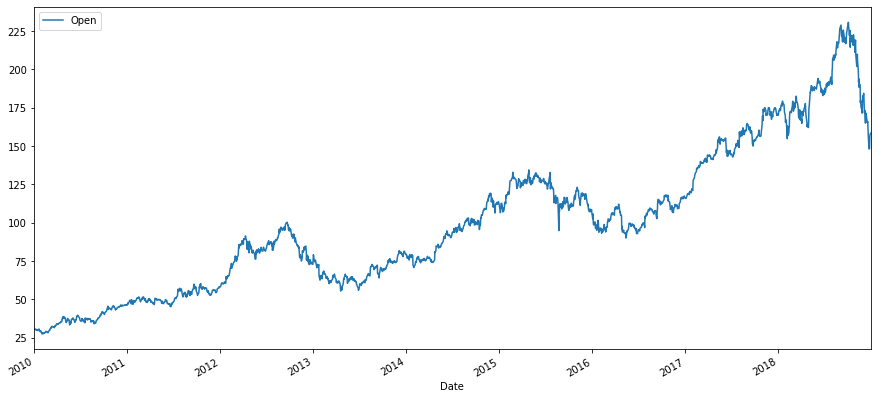

In [6]:
df[['Open']].plot(figsize=(15, 7))

7일 기준 MA 구하기

In [9]:
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


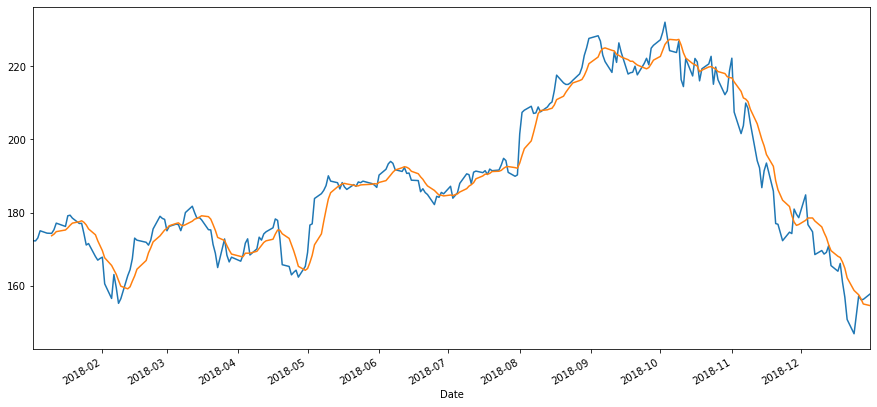

In [10]:
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot(figsize=(15, 7))

따로 30일치 MA의 결과를 별도의 column 으로 저장.

In [11]:
df['Close_30_Days_Mean'] = df['Close'].rolling(30).mean()

In [15]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Close_30_Days_Mean
Date,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,175.207334
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,173.630668
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,172.363334
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,171.163334
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,170.194668


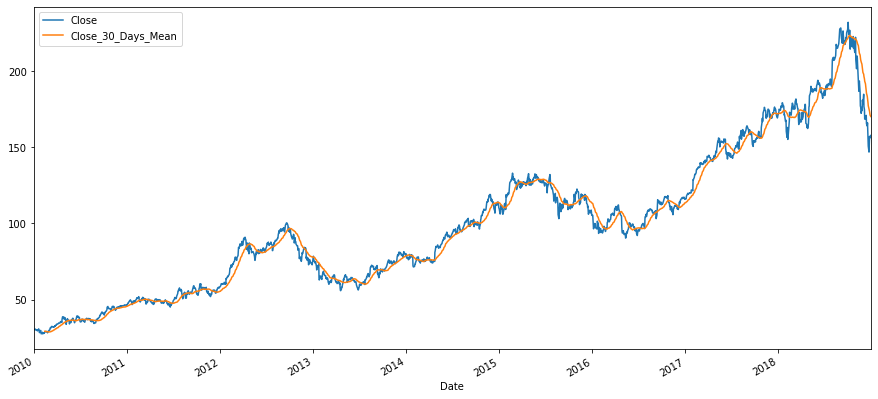

In [17]:
df[['Close', 'Close_30_Days_Mean']].plot(figsize=(15, 7))

## Pandas Datetime - Expanding

rolling mean 을 구하는 과정에서,  
시작점을 기준으로 점점 범위를 넓혀가며 구하기 위해선 expanding을 사용한다.

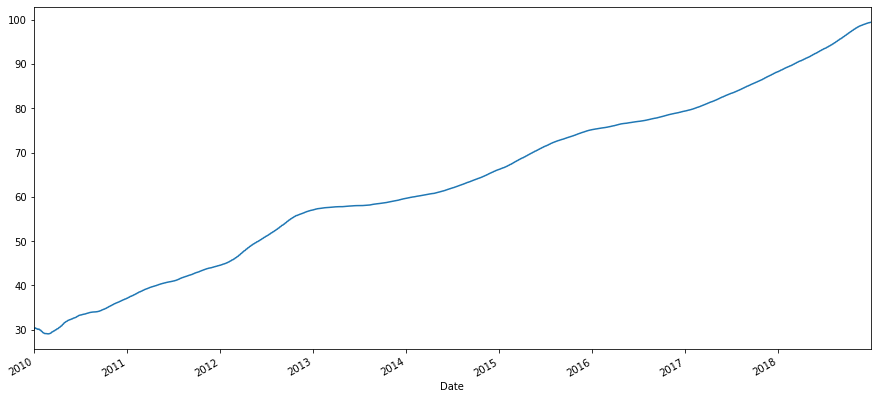

In [20]:
# min_periods 는 늘어날 범위의 크기이다.
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15, 7))  # 여기선 1 이므로 누적분포가 된다.